Dataset:https://www.kaggle.com/fmendes/diabetes-from-dat263x-lab01 Aim of the project is to predict whether or not a patient has diabetes,based on certain diagnostic measurements included in the dataset.

In [2]:
#importing all the neccessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt       
import seaborn as sns

In [3]:
#loading the dataset and reading using pandas 
df=pd.read_csv('C:/Users/CHANDU/Downloads/diabetes-from-dat263x-lab01/diabetes.csv')

In [4]:
#dispalying the first 10 values in the dataset
df.head(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


In [5]:
#dtypes gives the datatype of the data
df.dtypes

PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object

Histogram helps us to find the distribution of each feature in the dataset.The data is grouped in the form of bins and we can mention the number of bins we wanted to visualize.
X axis represent the range of the data values
Y axis represent the frequency

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012011EC8>,
      dtype=object)

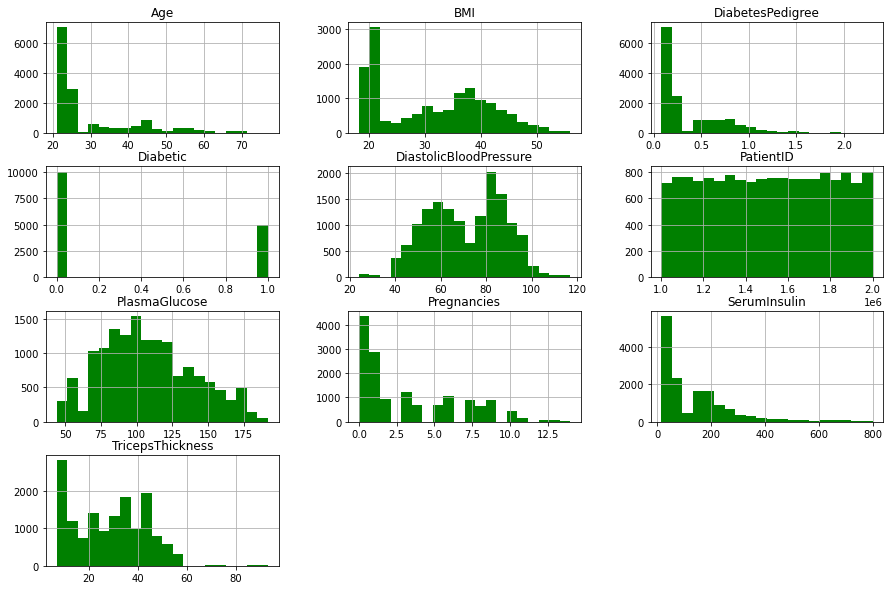

In [6]:
#Data Visualization
df.hist(figsize=(15,10),bins=20,color='green')

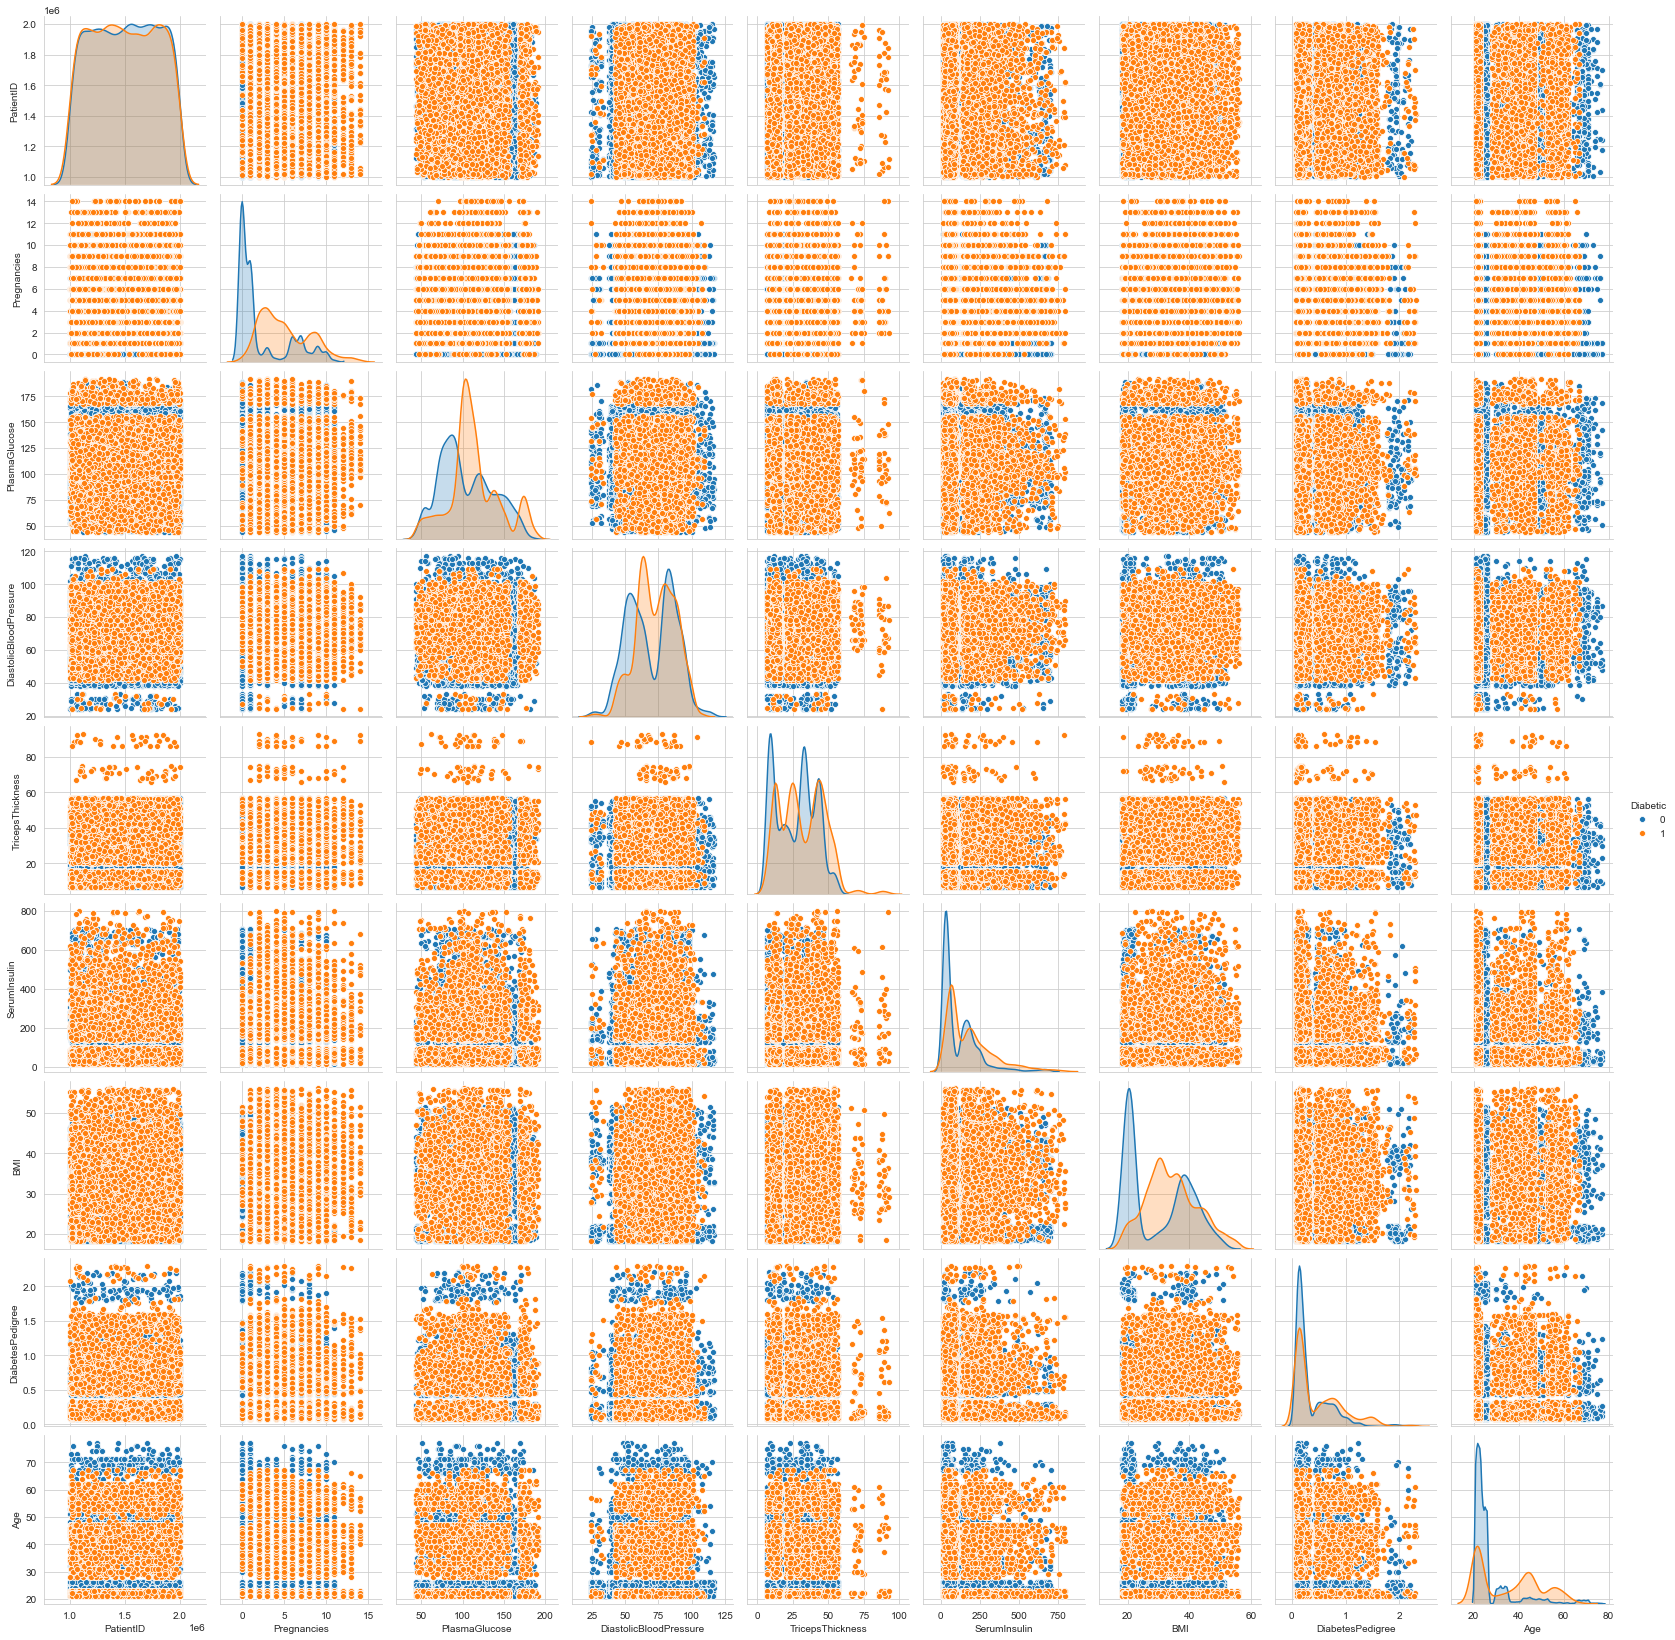

In [7]:
#to understand the relation between the different columns (features ) in our dataset we use pair plot (hue as outcome)
sns.set_style('whitegrid')
sns.pairplot(df,hue='Diabetic')

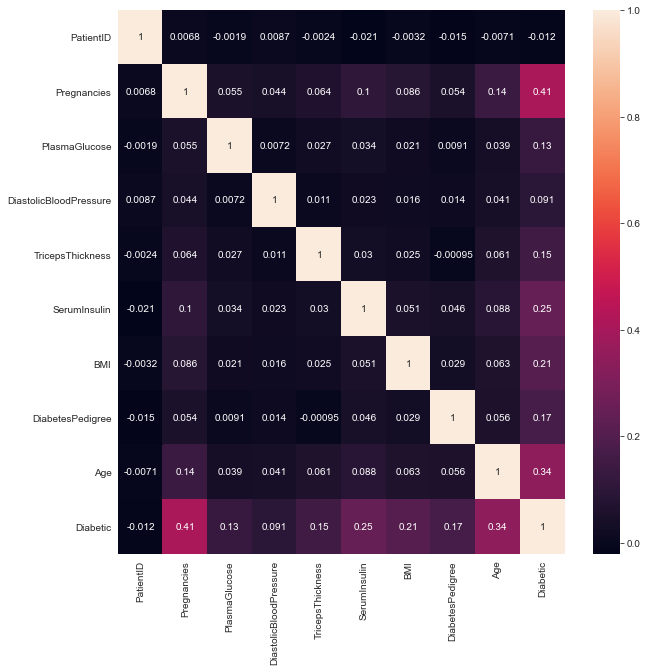

In [8]:
#to find the correlation between the variables we use heatmap
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

Pearson Correlation:Using this we can find the relationship between two variables(features).The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.From the heatmap we can visualize that there are no correlated variables.

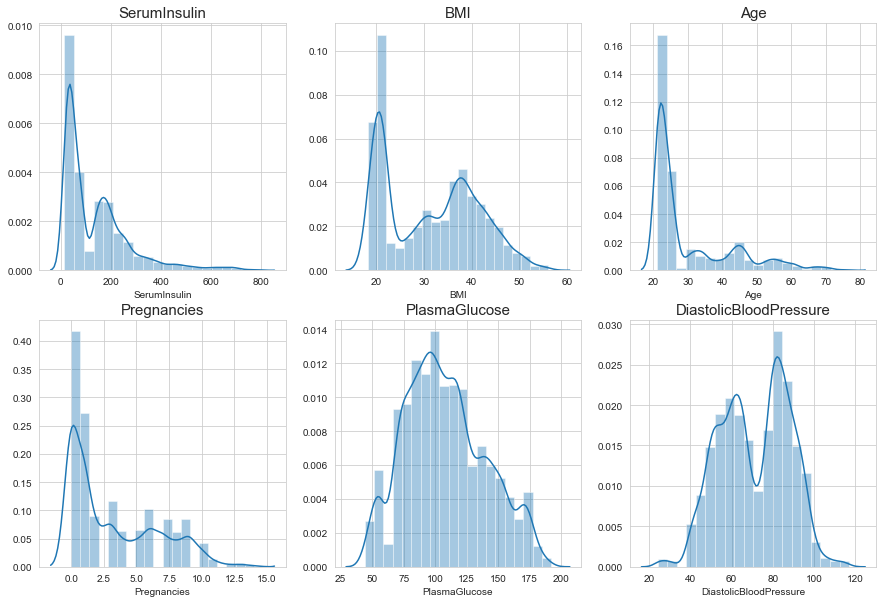

In [9]:
#plotting the distplots of the features
#distplot is used to visualize for univariant analysis throuh a histogram and KDE is a way to estimate the probability density function of a continuous random variable)
fig = plt.figure(figsize=(15,10))
fig.add_subplot(231)
plt.title('SerumInsulin', fontsize=15)
sns.distplot(df['SerumInsulin'], bins = 20, kde=True)
fig.add_subplot(232)
plt.title('BMI', fontsize=15)
sns.distplot(df['BMI'], bins = 20, kde=True)
fig.add_subplot(233)
plt.title('Age', fontsize=15)
sns.distplot(df['Age'], bins = 20, kde=True)
fig.add_subplot(234)
plt.title('Pregnancies', fontsize=15)
sns.distplot(df['Pregnancies'], bins = 20, kde=True)
fig.add_subplot(235)
plt.title('PlasmaGlucose', fontsize=15)
sns.distplot(df['PlasmaGlucose'], bins = 20, kde=True)
fig.add_subplot(236)
plt.title('DiastolicBloodPressure', fontsize=15)
sns.distplot(df['DiastolicBloodPressure'], bins = 20, kde=True)

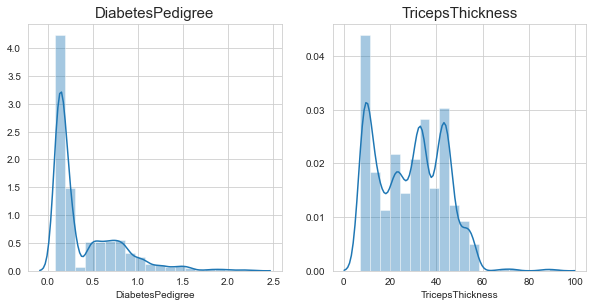

In [10]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)
plt.title('DiabetesPedigree', fontsize=15)
sns.distplot(df['DiabetesPedigree'], bins = 20, kde=True)


fig.add_subplot(222)
plt.title('TricepsThickness', fontsize=15)
sns.distplot(df['TricepsThickness'], bins = 20, kde=True)

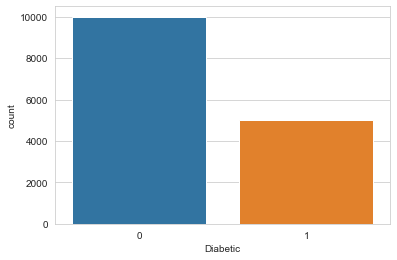

In [11]:
#gives the count here we are vizualising the count of the target variable
sns.countplot(x = 'Diabetic', data = df)

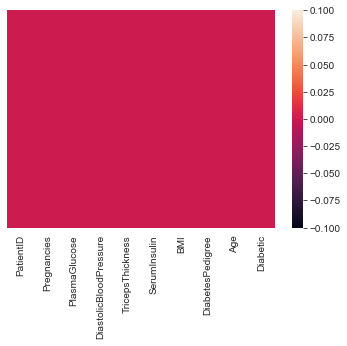

In [12]:
sns.heatmap(df.isnull(), yticklabels=False)

It is clear that dataset is free from null values

In [13]:
#checking whether the dataset has duplicates or not
df.duplicated().sum()

0

In [14]:
#check for null values in the dataset
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

describe(): This method works only with the numeric values.Using this method we get info of descriptive statistics like count,mean,standandard deviation of the particular feature in the dataset.while min and max gives us the minimum and maximum values.25%, 50%, and 75% are the quartiles of each features.

In [15]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


From the above we can clearly see that there is no minimum value of zero(0) for the variables like
=>PlasmaGlucose 
=>DiastolicBloodPressure 
=>TricepsThickness 
=>SerumInsulin 
=>BMI 
=>Age 
Hence our data is completely free from zeros.

In [16]:
df.isin(['?']).sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

Sometimes we may encounter with the special characters or symbols in the dataset.So to check whether our dataset is free from those we use isin() method and pass the character for which you want to find.

In [17]:
#seperating input variables and the target variable
#X contains all the independent variables(input variables)excluding the PatientID as it is not required to train the model
#input features are used to predict the target varaibale ('Diabetic')
#Y contain the target variable(Dependent varibale('Diabetic'))
X = df.iloc[:,1:9]
y = df.iloc[:,9]

In [18]:
#checking X(input variables after seperating)
X

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23


In [19]:
#target variable which is sepearted from the input varibales
y

0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

                                              Applying Logistic

In [20]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=56)

In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_log_pred = logmodel.predict(X_test)

D:\INSTALLED_SOFTWARES\envs\PythonCPU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
X_test.shape

(4950, 8)

In [23]:
#importing all the neccessary libararies required for accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
#accuracy metrics
print(confusion_matrix(y_test,y_log_pred))
print(classification_report(y_test,y_log_pred))
log_accuracy = accuracy_score(y_log_pred, y_test)
print(log_accuracy*100)

[[2966  365]
 [ 642  977]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3331
           1       0.73      0.60      0.66      1619

    accuracy                           0.80      4950
   macro avg       0.78      0.75      0.76      4950
weighted avg       0.79      0.80      0.79      4950

79.65656565656566


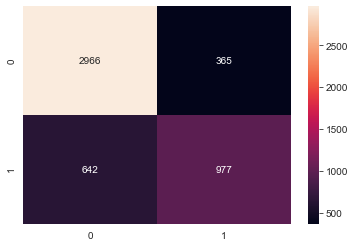

In [25]:
#visualizing the confusion matrix for logistic
cm = confusion_matrix(y_test,y_log_pred)
sns.heatmap(cm, annot = True, fmt='g')

                                     Decision Tree Classifier

In [26]:
#Applying Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
#Creating an instance of DecisionTreeClassifier() called dec_tree
dec_tree = DecisionTreeClassifier()
#fitting the model to the training data
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
#predictions from the test data
y_dec_pred = dec_tree.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_dec_pred))
print(classification_report(y_test,y_dec_pred))
dec_tree_accuracy = accuracy_score(y_dec_pred, y_test)
print(dec_tree_accuracy*100)

[[3100  231]
 [ 232 1387]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3331
           1       0.86      0.86      0.86      1619

    accuracy                           0.91      4950
   macro avg       0.89      0.89      0.89      4950
weighted avg       0.91      0.91      0.91      4950

90.64646464646464


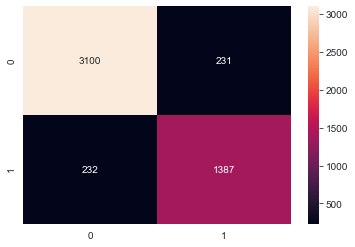

In [29]:
cm = confusion_matrix(y_test,y_dec_pred)
sns.heatmap(cm, annot = True, fmt='g')

                                    Xgboost Classifier

In [30]:
#Applying Xgboost
# Fitting XGBoost to the Training set and predicting the results
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
y_xg_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_xg_pred))
print(classification_report(y_test,y_xg_pred))
print(accuracy_score(y_test,y_xg_pred)*100)

[[3220  111]
 [ 123 1496]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3331
           1       0.93      0.92      0.93      1619

    accuracy                           0.95      4950
   macro avg       0.95      0.95      0.95      4950
weighted avg       0.95      0.95      0.95      4950

95.27272727272728


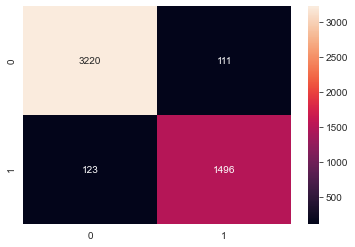

In [32]:
cm = confusion_matrix(y_test,y_xg_pred)
sns.heatmap(cm, annot = True, fmt='g')

                                        Support Vector Classifier

Feature Scaling:It is important to scale the parameters for distance based models hence svc works on distance metrics so we perform standardization

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
#applying support vector classifier
from sklearn.svm import SVC
s_model = SVC()
s_model.fit(X_train,y_train)
svm_predicted = s_model.predict(X_test)

In [35]:
print(confusion_matrix(y_test,svm_predicted))
print(classification_report(y_test,svm_predicted))
svm_accuracy = accuracy_score(svm_predicted, y_test)
print(svm_accuracy*100)

[[3096  235]
 [ 337 1282]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3331
           1       0.85      0.79      0.82      1619

    accuracy                           0.88      4950
   macro avg       0.87      0.86      0.87      4950
weighted avg       0.88      0.88      0.88      4950

88.44444444444444


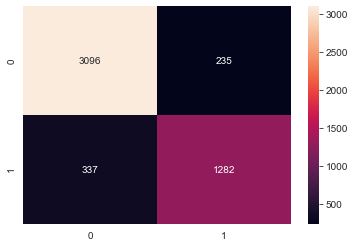

In [36]:
cm = confusion_matrix(y_test,svm_predicted)
sns.heatmap(cm, annot = True, fmt='g')

From all the above algorithms Xgboost performed the best with 95.27% and next to xgboost Decisiontreeclassifier performed 90.54% whereas logistic performed low with poor accuracy.